- Sequential RANSAC / Recursive-RANSAC
- Hough Transform
- Line Segment Detection
- Convolution: file:///Users/kptruong/Downloads/Efficient_line_detection_method_bas.pdf

# Import data

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns; sns.set()
import cv2
from scipy.signal import convolve2d

from src import dasly, helper

In [2]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 103015',
    # end='20230628 113128',
    duration=60
)

Welcome to Dasly!
7 files, from 103014 to 103114


In [17]:
das.signal.shape

(60000, 800)

# Heatmap

Heatmap with vmin -1.21e-05, vmax 1.21e-05


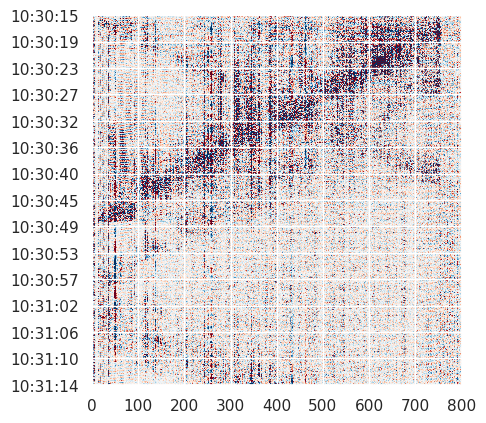

In [3]:
das.heatmap()

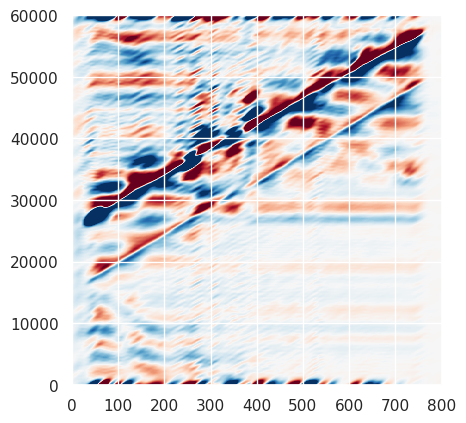

In [16]:
cmap = 'RdBu'
percentile = np.quantile(np.abs(das.signal), 0.95)
norm = colors.TwoSlopeNorm(
    vmin=-percentile,
    vmax=percentile,
    vcenter=(vmin + vmax) / 2
)

plt.imshow(
    X=das.signal[::-1],
    aspect=das.signal.shape[1] / das.signal.shape[0],  # square
    cmap=cmap,
    norm=norm,
    interpolation='none',  # no interpolation
    # to see the last values of x-axis
    extent=[0, das.signal.shape[1], 0, das.signal.shape[0]]
);
# # adjust the y-axis to time
# y = self.signal.iloc[::-1].index  # values of y-axis
# y = [i.isoformat(timespec=time_precision) for i in y]
# ny = len(y)
# no_labels = 15  # how many labels to see on axis y
# step_y = int(ny / (no_labels - 1))  # step between consecutive labels
# y_positions = np.arange(0, ny, step_y)  # pixel count at label position
# y_labels = y[::step_y]  # labels you want
# plt.yticks(y_positions, y_labels)

___

In [4]:
das.convolve()

___

In [2]:
import math

In [1]:
import torch

In [2]:
import torch
torch.zeros(1).cuda()

tensor([0.], device='cuda:0')

In [4]:
torch.cuda.is_available()

True

: 

In [2]:
import torch

# Check if a GPU is available
if not torch.cuda.is_available():
    raise RuntimeError("No GPU found. Make sure you have a GPU and PyTorch with GPU support installed.")


RuntimeError: No GPU found. Make sure you have a GPU and PyTorch with GPU support installed.

In [25]:
torch.cuda.is_available()

False

In [22]:
385 * ((2/3)**2) * 0.5 * 0.5

42.77777777777778

In [7]:
das.signal_raw.shape

(60000, 800)

Threshold 1.21e-05


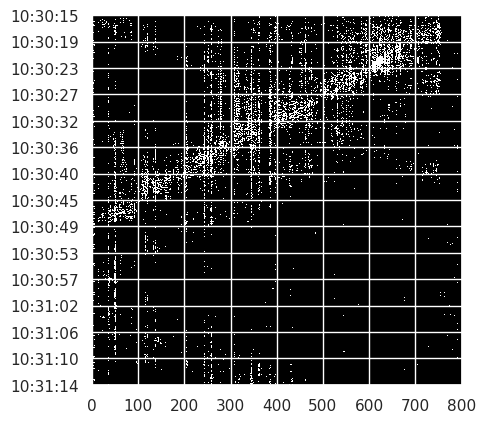

In [4]:
das.binary_filter()
das.heatmap()
das.reset()

Heatmap with vmin 0, vmax 10


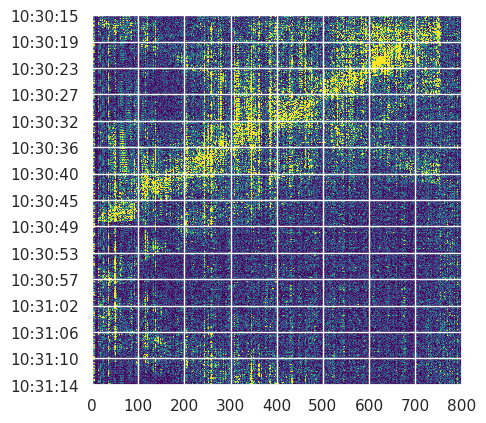

In [5]:
das.grey_filter()
das.heatmap()
das.reset()

# Speed - Angle

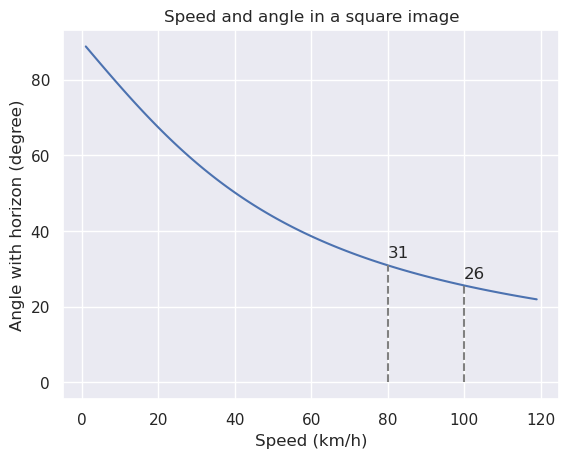

In [8]:
speeds = np.arange(1, 120, 1)
angles = [helper.speed_to_angle(i) for i in speeds]
sns.lineplot(x=speeds, y=angles)
plt.title('Speed and angle in a square image')
plt.xlabel('Speed (km/h)')
plt.ylabel('Angle with horizon (degree)')
plt.vlines(
    x=[80, 100],
    ymin=[0, 0],
    ymax=[helper.speed_to_angle(80), helper.speed_to_angle(100)],
    ls='--',
    color='grey'
)
for i in [80, 100]:
    plt.text(
        x=i,
        y=helper.speed_to_angle(i) + 2,
        s=f'{helper.speed_to_angle(i):.0f}'
    )

# Convolution

In [70]:
angle_degrees = 30
angle_radians = np.deg2rad(angle_degrees)
covariance_angle = angle_radians  # Angle in radians
# Create the covariance matrix
cov_matrix = np.array([[1, np.tan(covariance_angle)],
                       [np.tan(covariance_angle), 1]])

In [71]:
angle_radians / np.pi

0.16666666666666666

array([[1.        , 0.57735027],
       [0.57735027, 1.        ]])

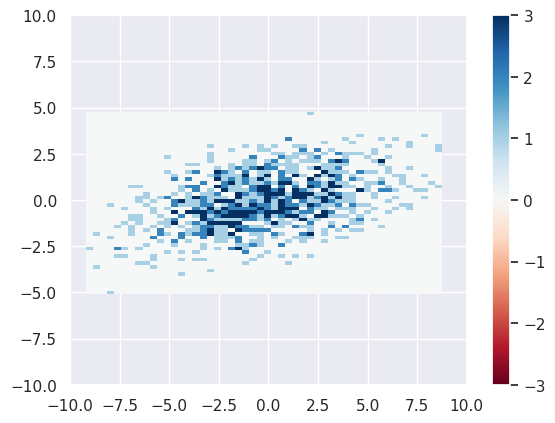

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the Gaussian distribution
mean = [0, 0]
covariance = [[10, 2], [2, 2]]

# Generate random data points from a 2D Gaussian distribution
data = np.random.multivariate_normal(mean, covariance, 1000)
# Create a density plot
plt.hist2d(data[:, 0], data[:, 1], bins=50, cmap='RdBu', vmin=-3, vmax=3)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.colorbar();